In [2]:
# Célula 1: Importação das bibliotecas e configuração inicial
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Configuração para que os gráficos do Seaborn tenham um estilo visual melhor
sns.set_style('whitegrid')

# Configuração para exibir todas as colunas do dataframe no Pandas
pd.set_option('display.max_columns', None)

# Mensagem de confirmação
print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [4]:
# Célula 2: Carregamento dos dados

caminho_arquivo = '../data/raw/obesity.csv' 
df = pd.read_csv(caminho_arquivo)

df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [25]:
# CÉLULA 3: PREPARAÇÃO DO DATAFRAME DE TRABALHO 

# 1. Criar uma cópia de segurança para o nosso trabalho
df_pt = df.copy()

# 2. Dicionário de renomeação 
mapa_colunas = {
    'Gender': 'genero',
    'Age': 'idade',
    'Height': 'altura_m',
    'Weight': 'peso_kg',
    'family_history': 'historia_familiar_sobrepeso', 
    'FAVC': 'come_comida_calorica_freq',
    'FCVC': 'freq_consumo_vegetais',
    'NCP': 'num_refeicoes_principais',
    'CAEC': 'come_entre_refeicoes',
    'SMOKE': 'fumante',
    'CH2O': 'consumo_agua_litros',
    'SCC': 'monitora_calorias',
    'FAF': 'freq_atividade_fisica',
    'TUE': 'tempo_uso_dispositivos', 
    'CALC': 'freq_consumo_alcool',
    'MTRANS': 'meio_transporte',
    'Obesity': 'nivel_obesidade'
}

# 3. Renomear as colunas
df_pt.rename(columns=mapa_colunas, inplace=True)

# 4. Ajuste de Tipos de Dados: Convertendo idades e contagens para inteiros
df_pt['idade'] = df_pt['idade'].astype(int)
df_pt['freq_consumo_vegetais'] = df_pt['freq_consumo_vegetais'].astype(int)
df_pt['num_refeicoes_principais'] = df_pt['num_refeicoes_principais'].astype(int)
df_pt['consumo_agua_litros'] = df_pt['consumo_agua_litros'].astype(int)
df_pt['freq_atividade_fisica'] = df_pt['freq_atividade_fisica'].astype(int)
df_pt['tempo_uso_dispositivos'] = df_pt['tempo_uso_dispositivos'].astype(int)

# 5. Verificação final
print("--- Informações do DataFrame Processado ---")
df_pt.info()

print("\n--- 5 Primeiras Linhas do DataFrame Processado ---")
df_pt.head()

--- Informações do DataFrame Processado ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   genero                       2111 non-null   object 
 1   idade                        2111 non-null   int64  
 2   altura_m                     2111 non-null   float64
 3   peso_kg                      2111 non-null   float64
 4   historia_familiar_sobrepeso  2111 non-null   object 
 5   come_comida_calorica_freq    2111 non-null   object 
 6   freq_consumo_vegetais        2111 non-null   int64  
 7   num_refeicoes_principais     2111 non-null   int64  
 8   come_entre_refeicoes         2111 non-null   object 
 9   fumante                      2111 non-null   object 
 10  consumo_agua_litros          2111 non-null   int64  
 11  monitora_calorias            2111 non-null   object 
 12  freq_atividade_fisica        211

,genero,idade,altura_m,peso_kg,historia_familiar_sobrepeso,come_comida_calorica_freq,freq_consumo_vegetais,num_refeicoes_principais,come_entre_refeicoes,fumante,consumo_agua_litros,monitora_calorias,freq_atividade_fisica,tempo_uso_dispositivos,freq_consumo_alcool,meio_transporte,nivel_obesidade
0,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


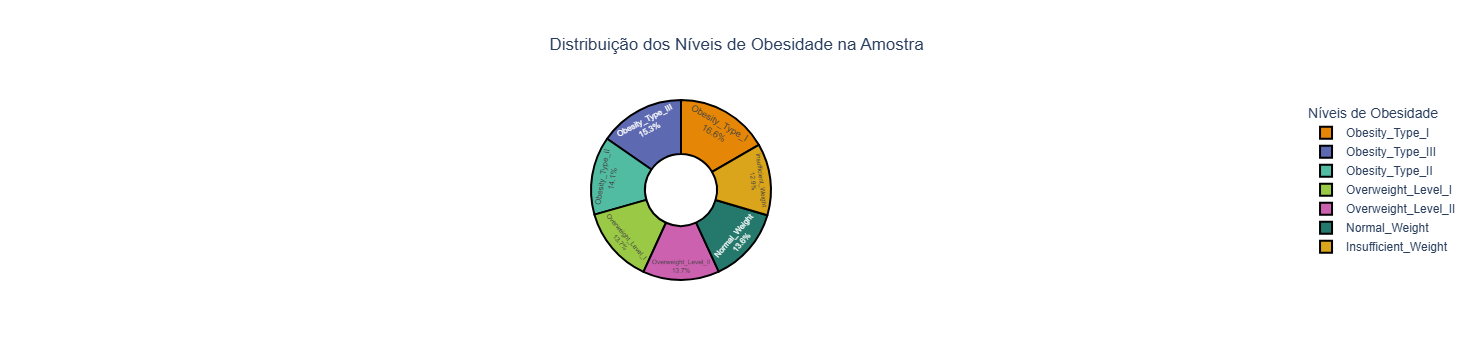

In [26]:
# CÉLULA 4: ANÁLISE DA VARIÁVEL ALVO
import plotly.express as px

# Definir uma paleta de cores para os níveis de obesidade
cores_obesidade = px.colors.qualitative.Vivid

# Criar o gráfico de pizza interativo
fig = px.pie(
    df_pt,
    names='nivel_obesidade',
    title='Distribuição dos Níveis de Obesidade na Amostra',
    color_discrete_sequence=cores_obesidade
)
fig.update_traces(
    textposition='inside',
    textinfo='percent+label',
    hole=.4, # Cria um "donut chart"
    marker=dict(line=dict(color='#000000', width=2))
)
fig.update_layout(
    title_x=0.5,
    legend_title_text='Níveis de Obesidade',
    font=dict(family="Arial, sans-serif", size=12)
)
fig.show()

--- Resumo Estatístico das Variáveis Numéricas Chave ---


,idade,altura_m,peso_kg
count,2111.00,2111.00,2111.00
mean,23.97,1.70,86.59
std,6.31,0.09,26.19
min,14.00,1.45,39.00
25%,19.00,1.63,65.47
50%,22.00,1.70,83.00
75%,26.00,1.77,107.43
max,61.00,1.98,173.00


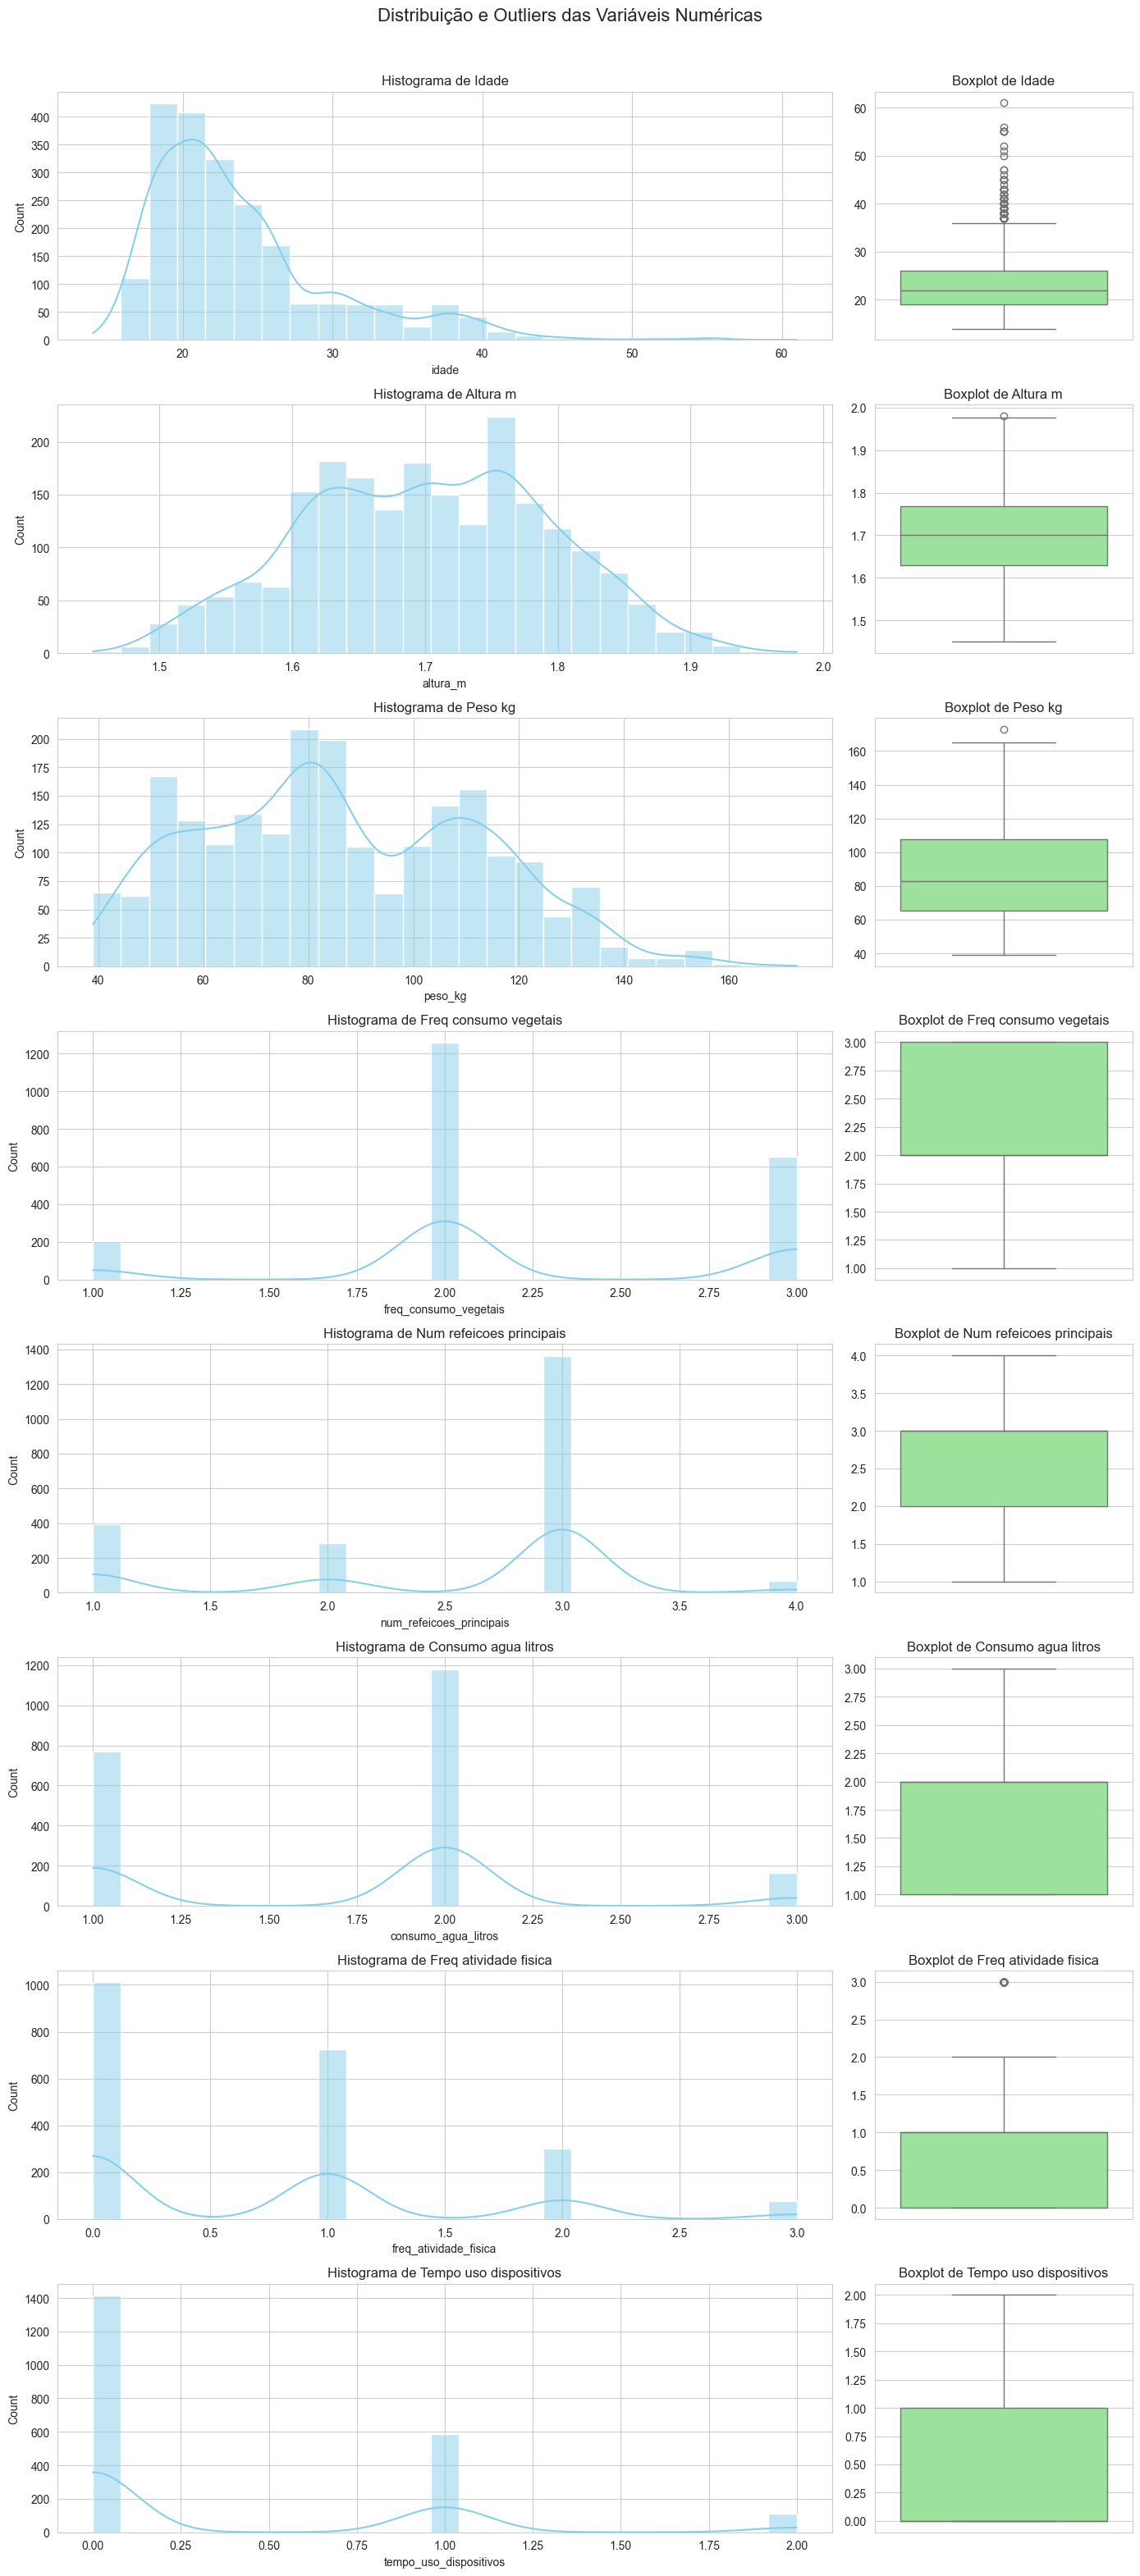

In [27]:
# CÉLULA 5: ANÁLISE DAS VARIÁVEIS NUMÉRICAS
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Resumo estatístico
print("--- Resumo Estatístico das Variáveis Numéricas Chave ---")
display(df_pt[['idade', 'altura_m', 'peso_kg']].describe().round(2))

# 2. Visualização da distribuição
colunas_numericas = df_pt.select_dtypes(include=np.number).columns.tolist()

fig, axes = plt.subplots(len(colunas_numericas), 2, figsize=(14, len(colunas_numericas) * 4), gridspec_kw={'width_ratios': [3, 1]})
fig.suptitle('Distribuição e Outliers das Variáveis Numéricas', fontsize=16)

for i, col in enumerate(colunas_numericas):
    sns.histplot(df_pt[col], kde=True, ax=axes[i, 0], color='skyblue', bins=25)
    axes[i, 0].set_title(f'Histograma de {col.replace("_", " ").capitalize()}')
    
    sns.boxplot(y=df_pt[col], ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'Boxplot de {col.replace("_", " ").capitalize()}')
    axes[i, 1].set_ylabel('')
    axes[i, 1].set_xticks([])

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

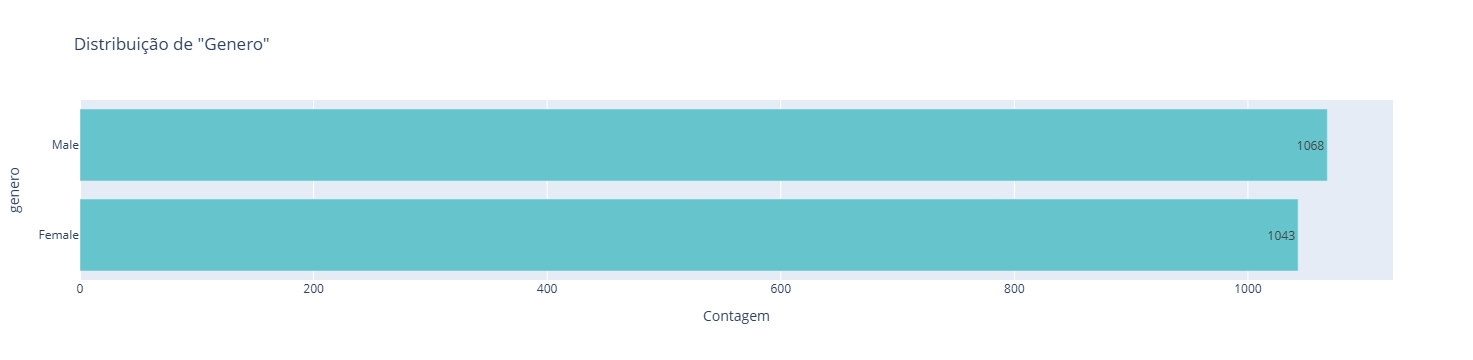

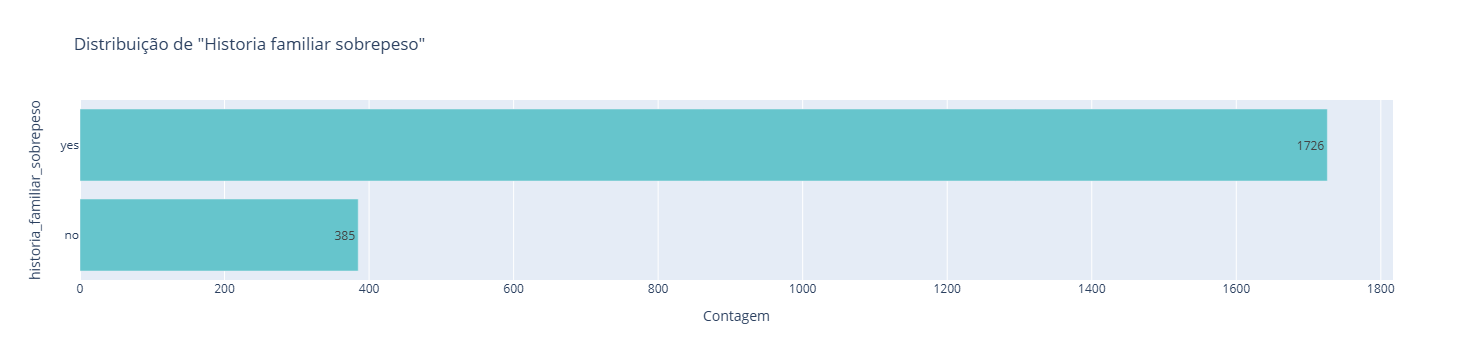

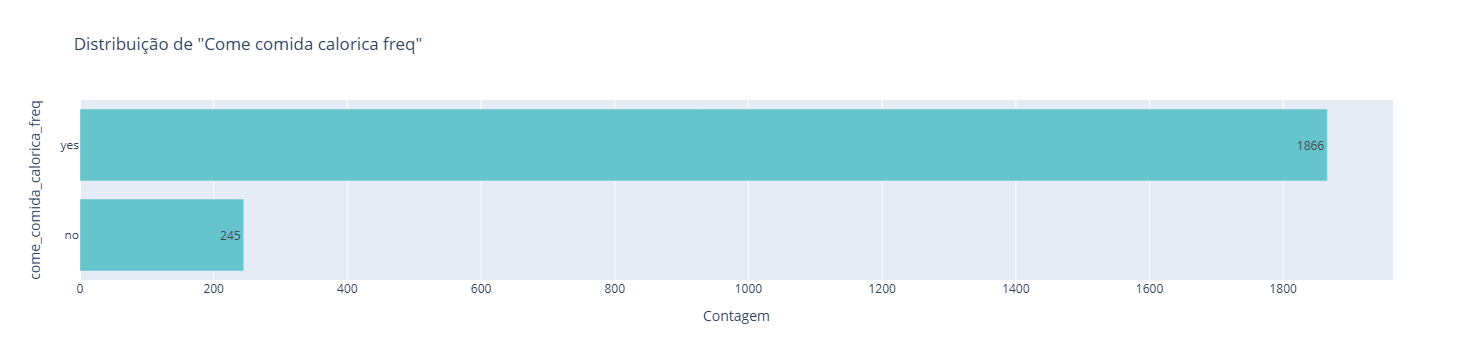

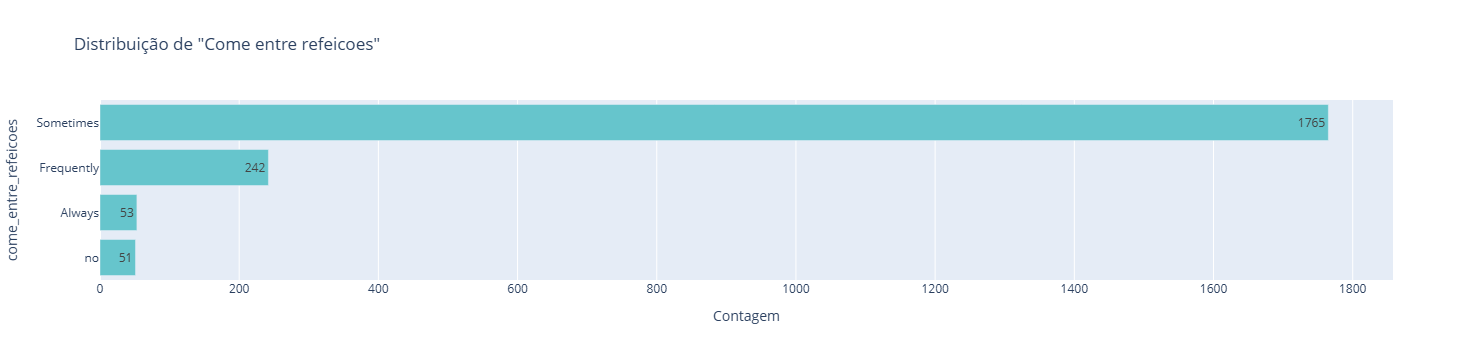

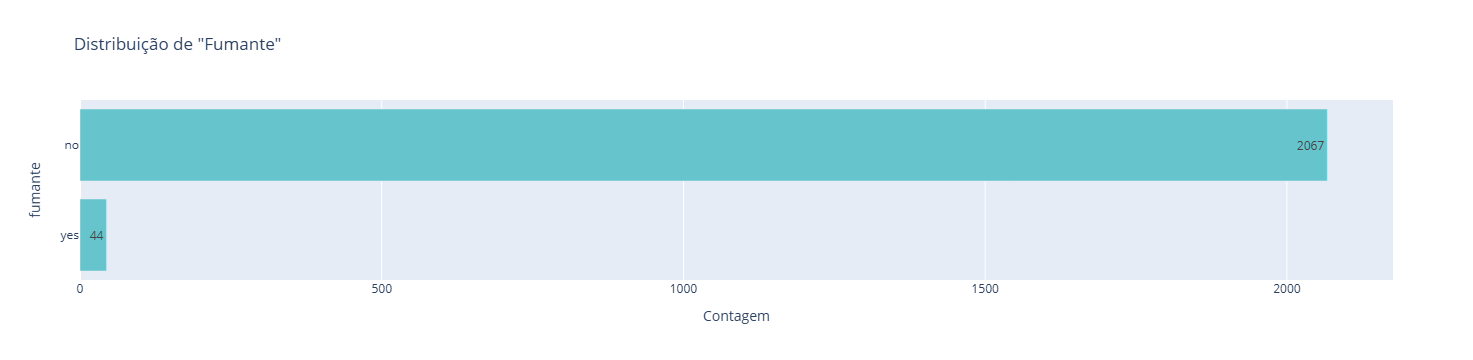

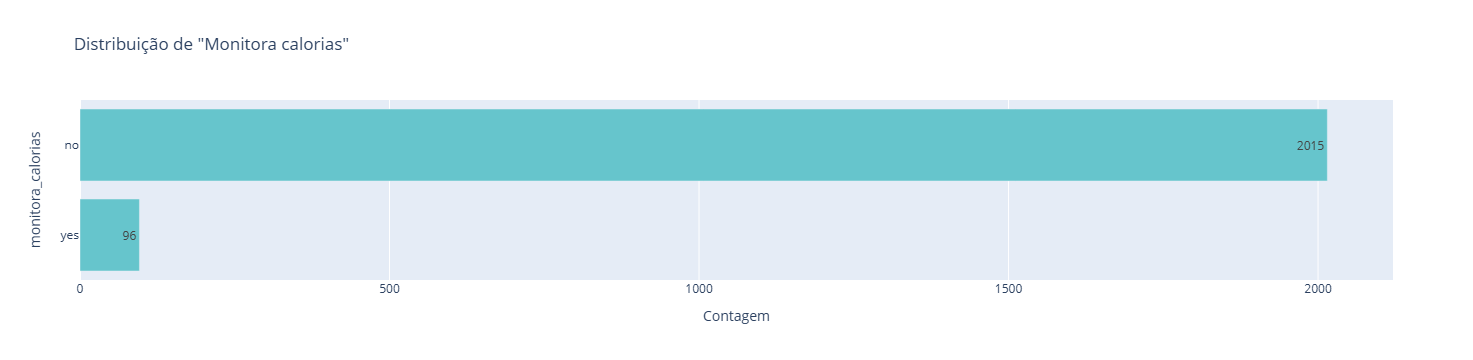

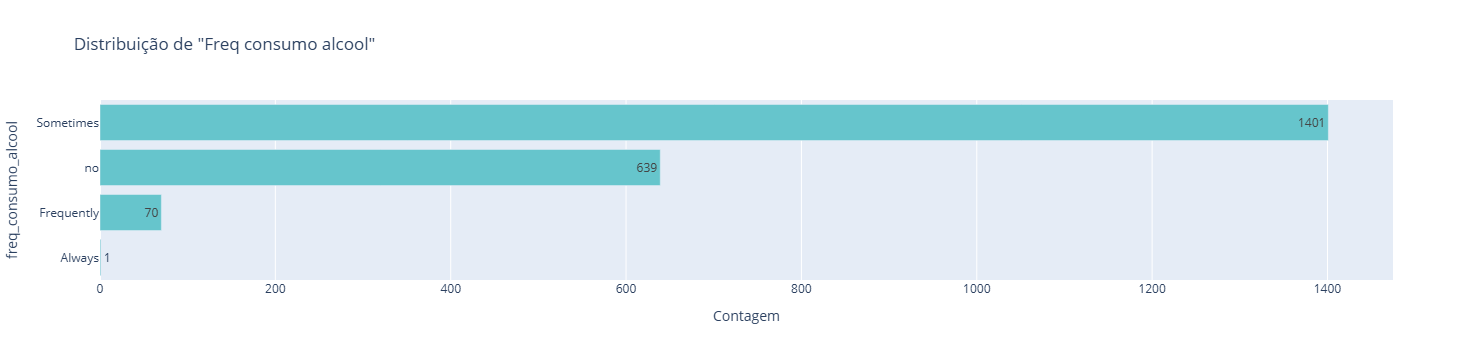

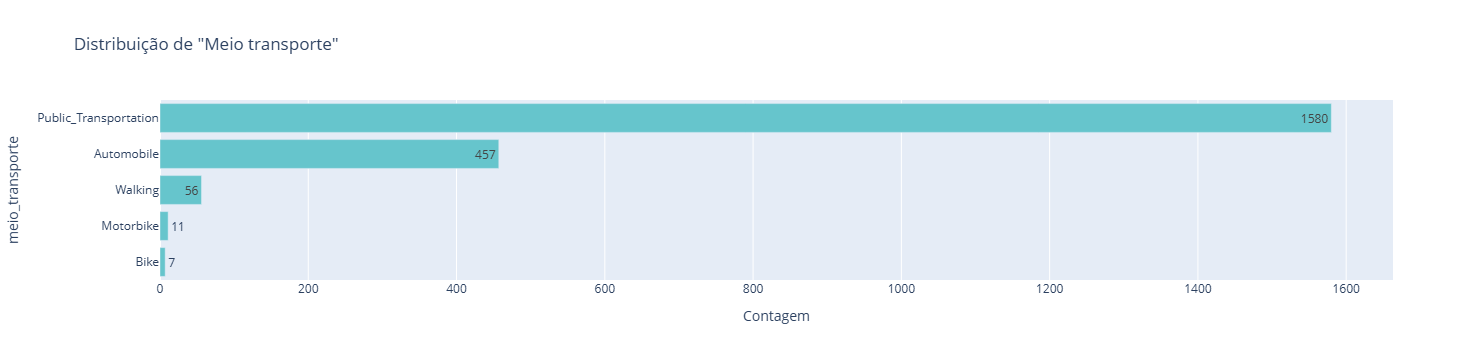

In [28]:
# CÉLULA 6: ANÁLISE DAS VARIÁVEIS CATEGÓRICAS
colunas_categoricas = df_pt.select_dtypes(include='object').drop(columns='nivel_obesidade').columns

for col in colunas_categoricas:
    fig = px.bar(
        df_pt[col].value_counts().sort_values(ascending=True),
        orientation='h',
        title=f'Distribuição de "{col.replace("_", " ").capitalize()}"',
        labels={'value': 'Contagem', 'index': col.replace("_", " ").capitalize()},
        text='value',
        color_discrete_sequence=px.colors.qualitative.Pastel
    )
    fig.update_layout(showlegend=False, yaxis={'categoryorder':'total ascending'})
    fig.show()

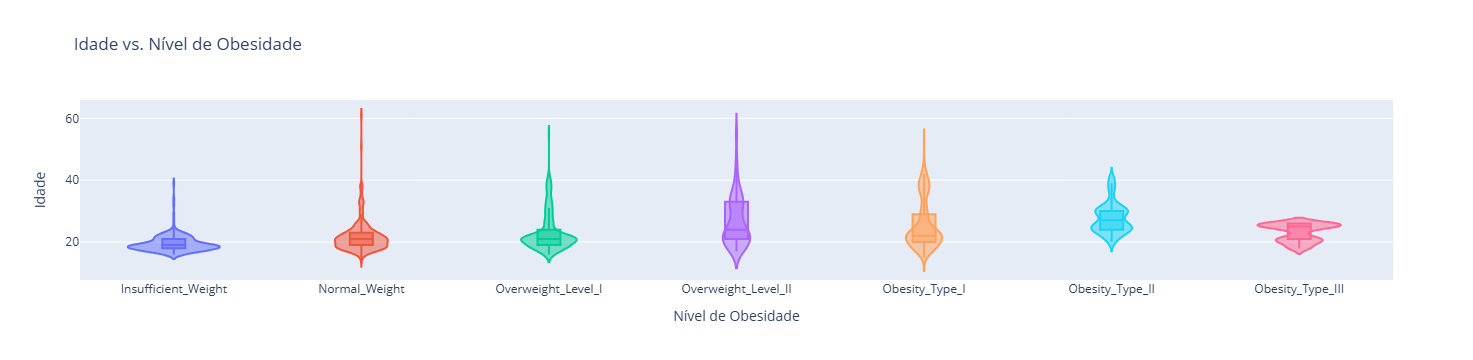

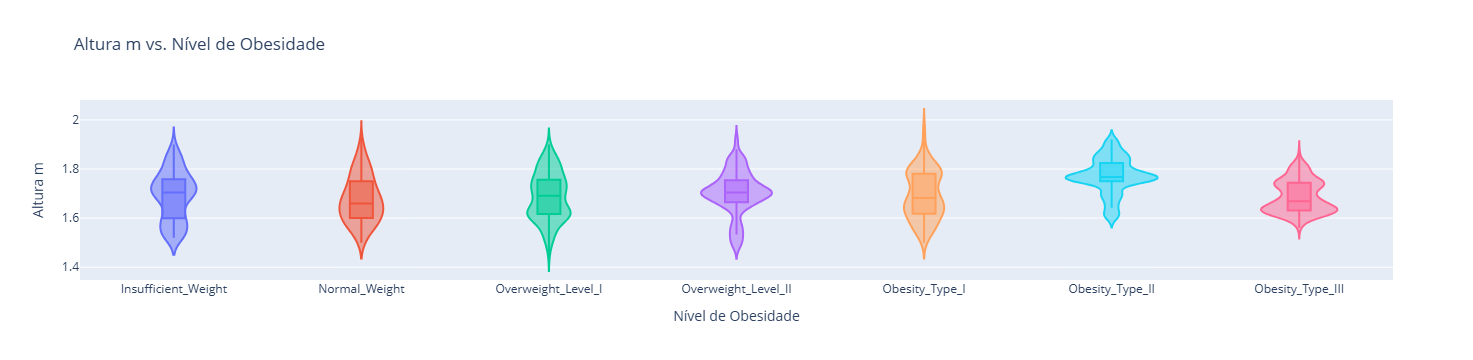

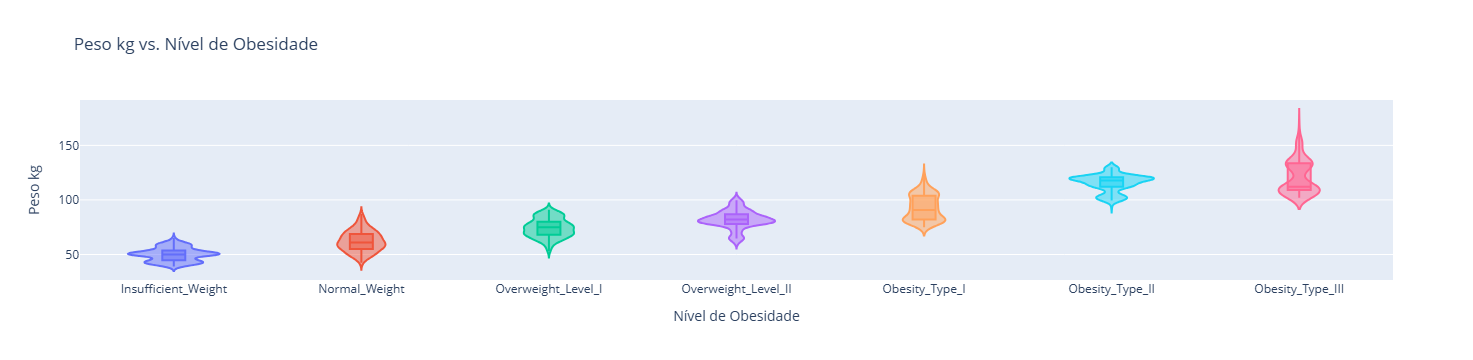

In [29]:
# CÉLULA 7: RELAÇÃO ENTRE VARIÁVEIS NUMÉRICAS E O NÍVEL DE OBESIDADE
ordem_obesidade = [
    'Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
    'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'
]

colunas_numericas_principais = ['idade', 'altura_m', 'peso_kg']

for col in colunas_numericas_principais:
    fig = px.violin(
        df_pt,
        x='nivel_obesidade',
        y=col,
        color='nivel_obesidade',
        box=True, # Adiciona um boxplot dentro do violino
        points=False, # Oculta os pontos individuais para um visual mais limpo
        title=f'{col.replace("_", " ").capitalize()} vs. Nível de Obesidade',
        labels={col: col.replace("_", " ").capitalize(), 'nivel_obesidade': 'Nível de Obesidade'},
        category_orders={'nivel_obesidade': ordem_obesidade}
    )
    fig.update_layout(showlegend=False)
    fig.show()

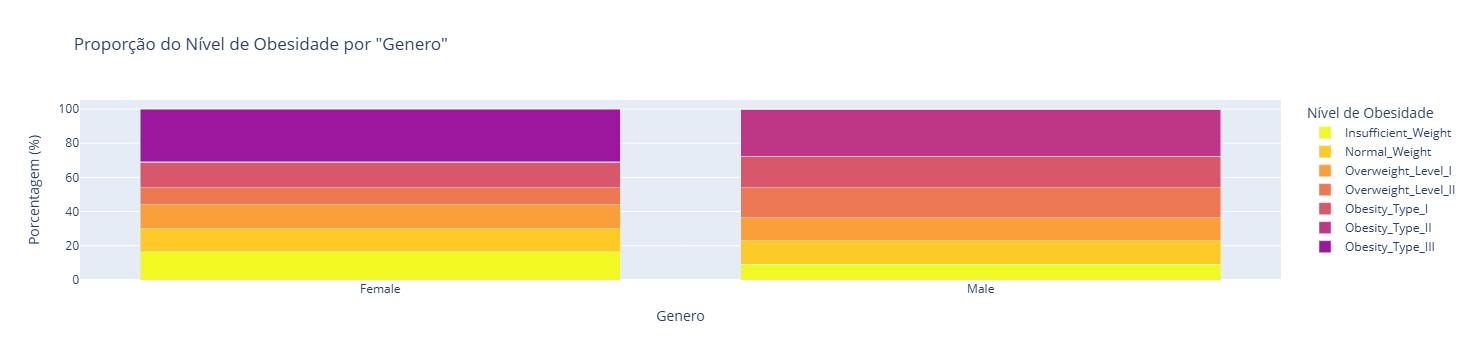

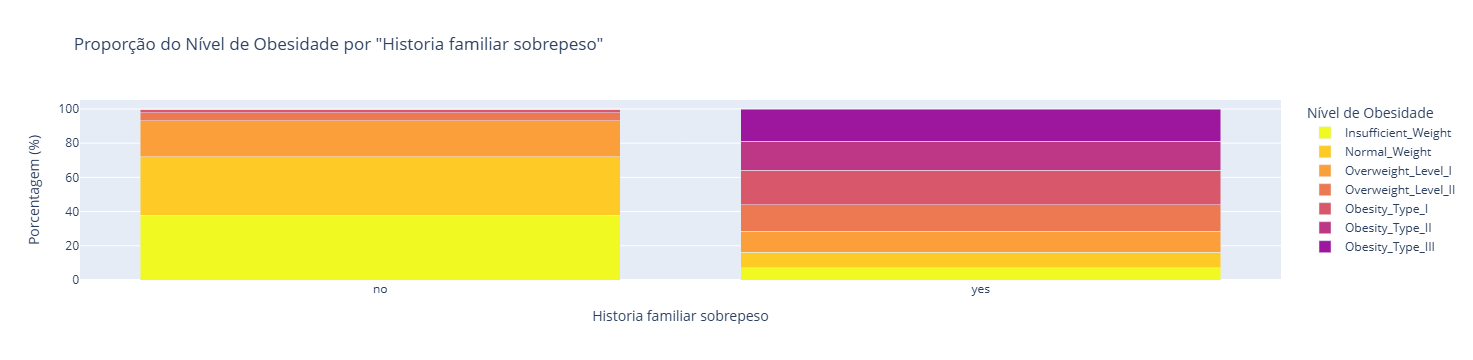

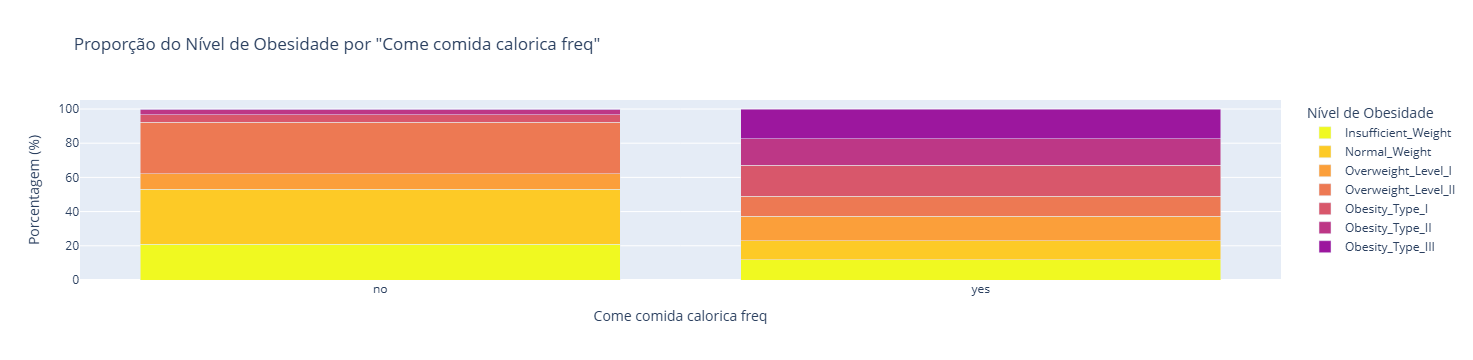

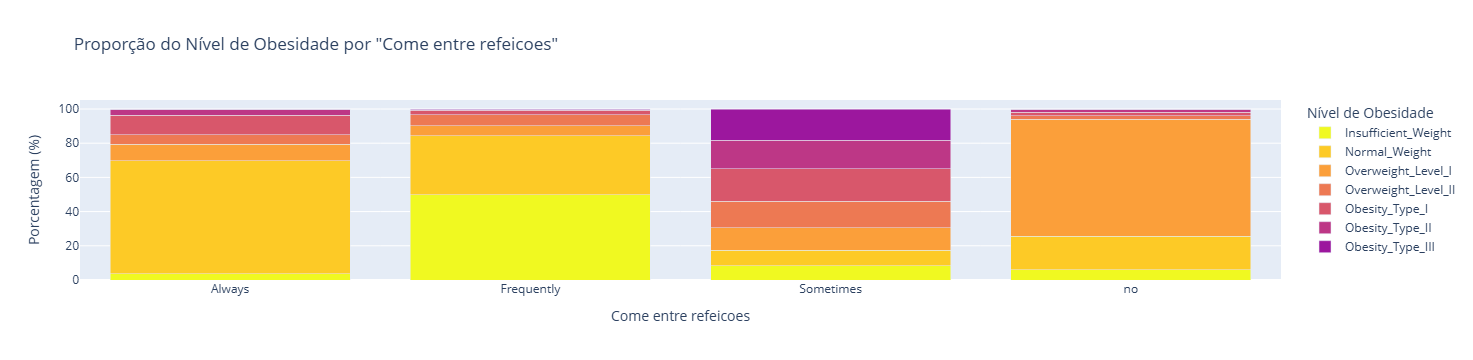

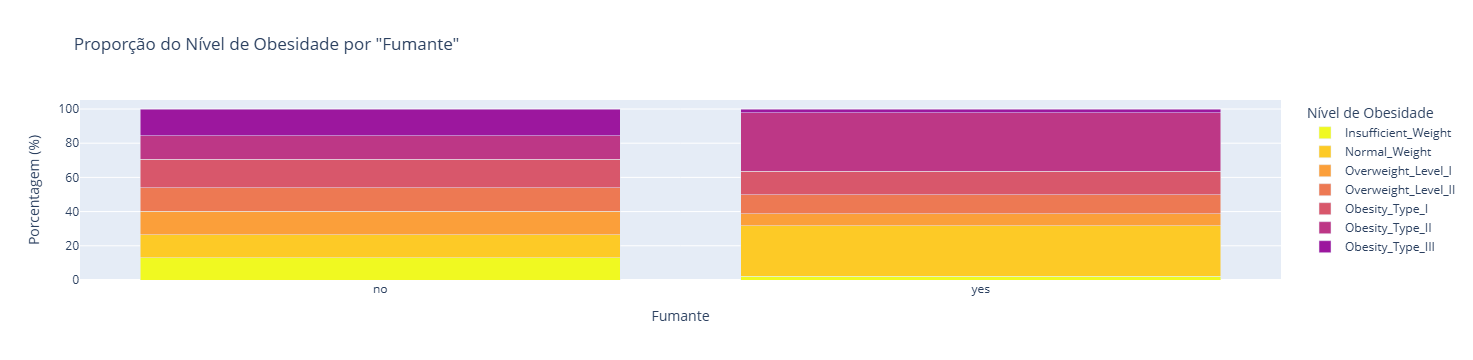

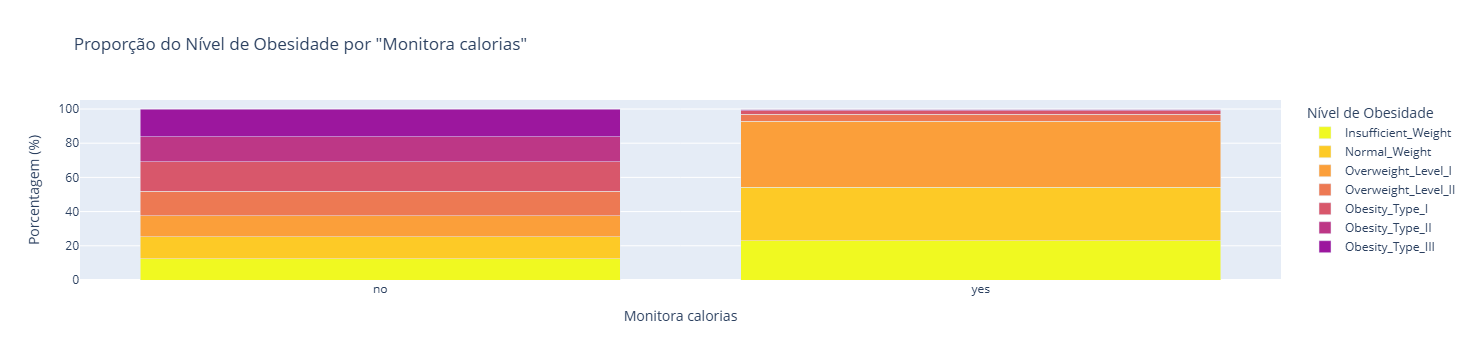

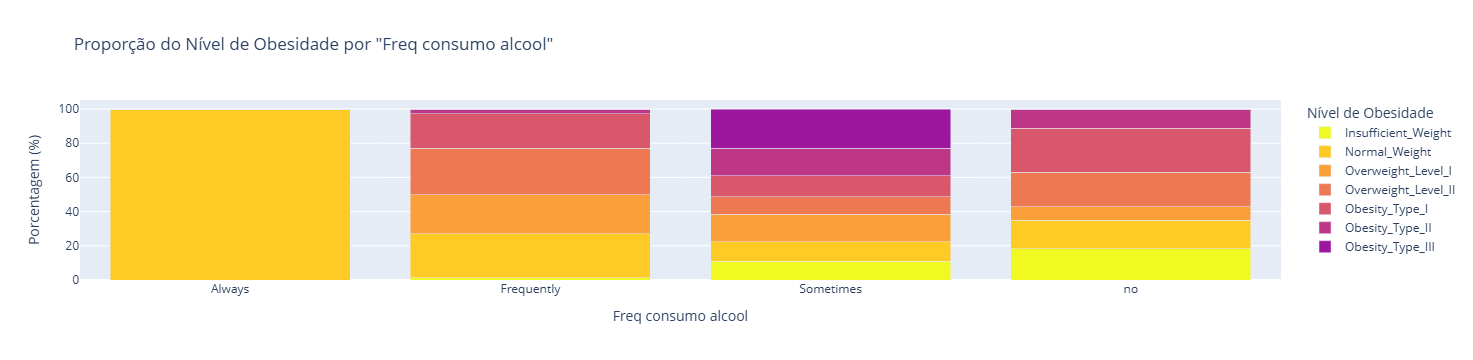

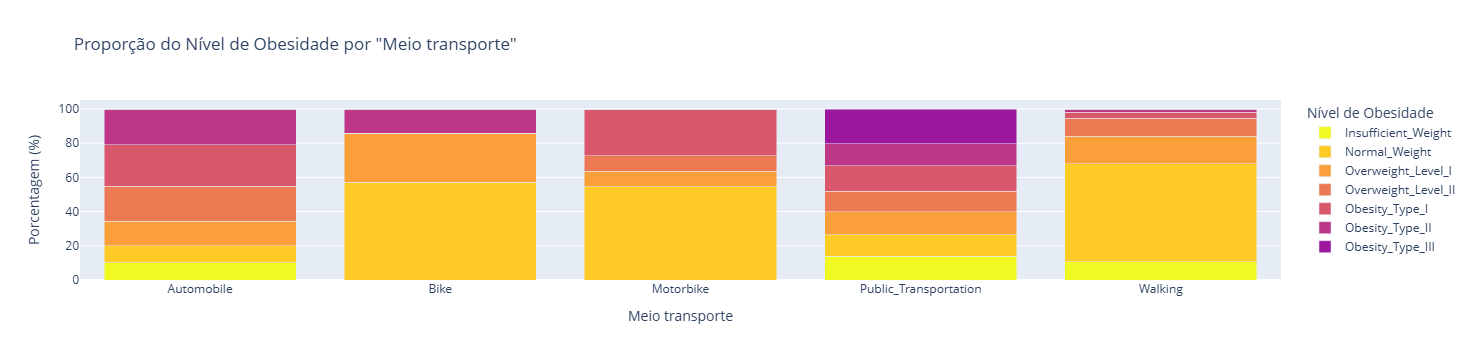

In [30]:
# CÉLULA 8: RELAÇÃO ENTRE VARIÁVEIS CATEGÓRICAS E O NÍVEL DE OBESIDADE
for col in colunas_categoricas:
    # Usamos o normalize='index' para obter a proporção dentro de cada categoria da variável
    tabela_percentual = pd.crosstab(df_pt[col], df_pt['nivel_obesidade'], normalize='index') * 100
    
    fig = px.bar(
        tabela_percentual,
        barmode='stack', # 'stack' para barras empilhadas que somam 100%
        title=f'Proporção do Nível de Obesidade por "{col.replace("_", " ").capitalize()}"',
        labels={'value': 'Porcentagem (%)', 'nivel_obesidade': 'Nível de Obesidade', col: col.replace("_", " ").capitalize()},
        color_discrete_sequence=px.colors.sequential.Plasma_r,
        category_orders={'nivel_obesidade': ordem_obesidade}
    )
    fig.show()

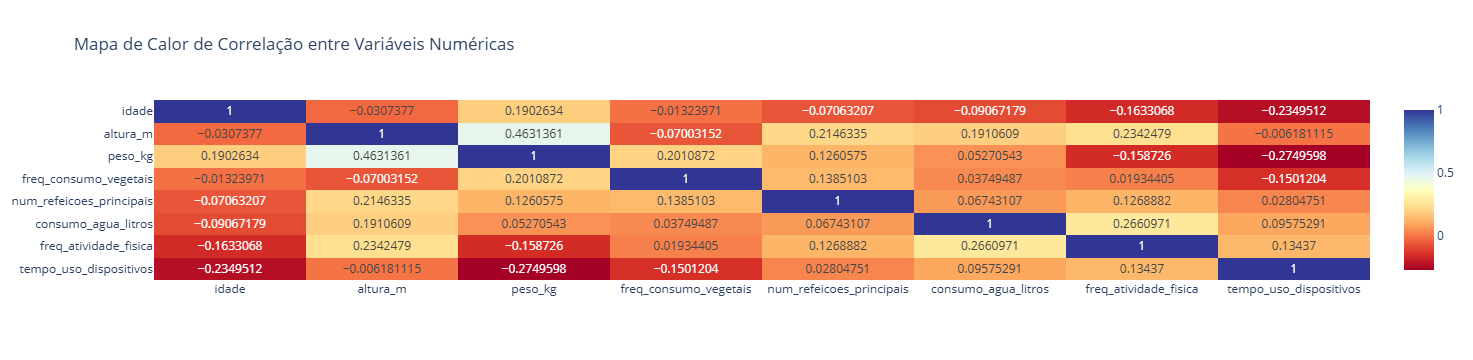

In [31]:
# CÉLULA 9: MAPA DE CALOR DE CORRELAÇÃO
df_numerico_corr = df_pt.select_dtypes(include=np.number)
matriz_corr = df_numerico_corr.corr()

fig = px.imshow(
    matriz_corr,
    text_auto=True, # Mostra os valores de correlação no mapa
    aspect="auto",
    color_continuous_scale='RdYlBu', # Paleta de cores: Vermelho (negativo) - Amarelo (zero) - Azul (positivo)
    title='Mapa de Calor de Correlação entre Variáveis Numéricas'
)
fig.show()